<img src="images/IPL.jpg" width="750" height="300">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
import plotly.graph_objects as go
style.use('ggplot')
%matplotlib inline

import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import cufflinks as cf

init_notebook_mode(connected=True)

cf.go_offline()

## Match Anaysis 

In [2]:
matches = pd.read_csv(r'I:\Python\Projects\IPL\dataset\2008_2018\matches.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               696 non-null    int64 
 1   season           696 non-null    int64 
 2   city             689 non-null    object
 3   date             696 non-null    object
 4   team1            696 non-null    object
 5   team2            696 non-null    object
 6   toss_winner      696 non-null    object
 7   toss_decision    696 non-null    object
 8   result           696 non-null    object
 9   dl_applied       696 non-null    int64 
 10  winner           693 non-null    object
 11  win_by_runs      696 non-null    int64 
 12  win_by_wickets   696 non-null    int64 
 13  player_of_match  693 non-null    object
 14  venue            696 non-null    object
 15  umpire1          695 non-null    object
 16  umpire2          695 non-null    object
 17  umpire3          60 non-null     ob

In [5]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [6]:
seasons = matches['season'].nunique()
print(f'Total Season of IPL : {seasons}')

total_matches = matches['id'].count()
print(f'Total Matches from 2008 to 2019 : {total_matches}')

Total Season of IPL : 11
Total Matches from 2008 to 2019 : 696


In [7]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [8]:
teams = matches['team1'].nunique()
print(f'Total Teams in IPL history : {teams}')

Total Teams in IPL history : 14


## Teams in IPL history

In [9]:
teams = pd.DataFrame(matches['team1'].unique(),columns=['Teams'])
teams

,Teams
0,Sunrisers Hyderabad
1,Mumbai Indians
2,Gujarat Lions
3,Rising Pune Supergiant
4,Royal Challengers Bangalore
5,Kolkata Knight Riders
6,Delhi Daredevils
7,Kings XI Punjab
8,Chennai Super Kings
9,Rajasthan Royals


## venue

In [10]:
venue = matches['venue'].nunique()
print(f'Total Venues : {venue}')

Total Venues : 35


In [11]:
venue = pd.DataFrame(matches['venue'].unique(),columns=['Venue'])
venue

,Venue
0,"Rajiv Gandhi International Stadium, Uppal"
1,Maharashtra Cricket Association Stadium
2,Saurashtra Cricket Association Stadium
3,Holkar Cricket Stadium
4,M Chinnaswamy Stadium
5,Wankhede Stadium
6,Eden Gardens
7,Feroz Shah Kotla
8,"Punjab Cricket Association IS Bindra Stadium, ..."
9,Green Park


## Matches per Season

In [12]:
print(f'Matches per Season : \n{matches["season"].value_counts()}')

Matches per Season : 
2013    76
2012    74
2011    73
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64


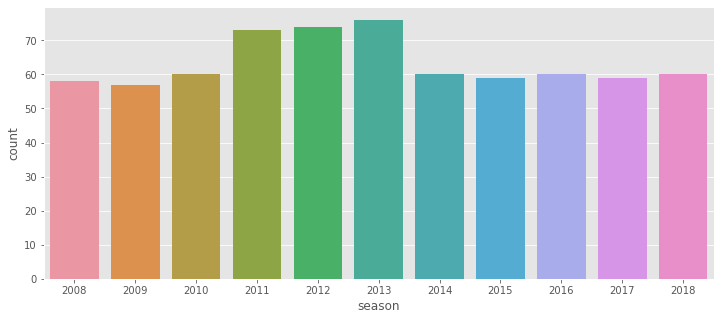

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='season',data=matches)   #2011,2012,2013 was season in which highest matches were played

## Matches played on several venues

In [14]:
match_venue = matches['venue'].value_counts().to_frame()
match_venue.style.background_gradient(cmap='Reds')
# match_venue.columns

,venue
M Chinnaswamy Stadium,73
Eden Gardens,70
Feroz Shah Kotla,67
Wankhede Stadium,66
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,40
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Dr DY Patil Sports Academy,17


## Total matches played by each team

In [15]:
team1 = matches['team1'].value_counts()

In [16]:
team2 = matches['team2'].value_counts()

In [17]:
total_matches = team1 + team2
team_match = total_matches.to_frame()
len(team_match)
team_match = team_match.rename(columns={0:'Matches'})
team_match.style.background_gradient(cmap='Reds')
team_match.sort_values(by=['Matches'],ascending=False,inplace=True)
team_match.style.background_gradient(cmap='Reds')

,Matches
Mumbai Indians,171
Royal Challengers Bangalore,166
Kolkata Knight Riders,164
Kings XI Punjab,162
Delhi Daredevils,161
Chennai Super Kings,147
Rajasthan Royals,133
Sunrisers Hyderabad,93
Deccan Chargers,75
Pune Warriors,46


## Win matches per Teams

In [18]:
wins = pd.DataFrame(matches['winner'].value_counts())
wins.shape

(14, 1)

In [19]:
wins.index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Gujarat Lions', 'Pune Warriors', 'Rising Pune Supergiant',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype='object')

In [20]:
wins.reset_index(inplace=True)

In [21]:
wins.columns = ['Teams','Winning Matches']

In [22]:
wins

,Teams,Winning Matches
0,Mumbai Indians,98
1,Chennai Super Kings,90
2,Kolkata Knight Riders,86
3,Royal Challengers Bangalore,79
4,Kings XI Punjab,76
5,Rajasthan Royals,70
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,52
8,Deccan Chargers,29
9,Gujarat Lions,13


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

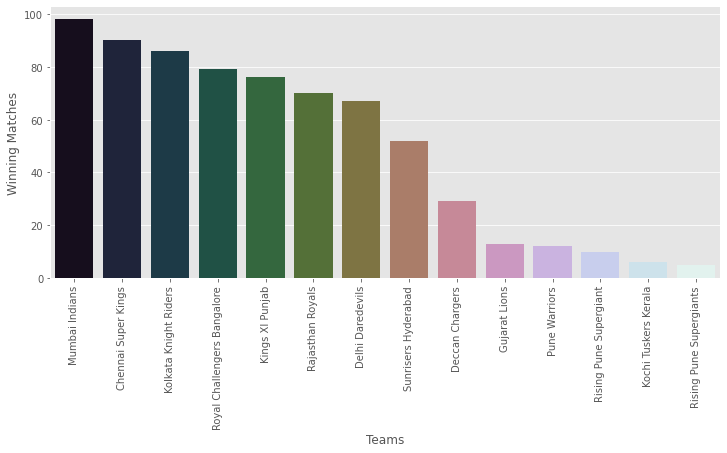

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(x='Teams',y='Winning Matches',palette='cubehelix',data=wins)
plt.xticks(rotation='vertical')
# Mumbai Indians wins highest number of matches : 98

In [24]:
team_match.reset_index(inplace=True)
team_match.columns = ['Teams','Total Matches']
team_match

,Teams,Total Matches
0,Mumbai Indians,171
1,Royal Challengers Bangalore,166
2,Kolkata Knight Riders,164
3,Kings XI Punjab,162
4,Delhi Daredevils,161
5,Chennai Super Kings,147
6,Rajasthan Royals,133
7,Sunrisers Hyderabad,93
8,Deccan Chargers,75
9,Pune Warriors,46


In [25]:
teams_df = pd.merge(wins,team_match,on='Teams')

In [26]:
teams_df.rename(columns={'Total Matches_x':'Winnig Matches','Total Matches_y':'Total Matches'},inplace=True)
teams_df

,Teams,Winning Matches,Total Matches
0,Mumbai Indians,98,171
1,Chennai Super Kings,90,147
2,Kolkata Knight Riders,86,164
3,Royal Challengers Bangalore,79,166
4,Kings XI Punjab,76,162
5,Rajasthan Royals,70,133
6,Delhi Daredevils,67,161
7,Sunrisers Hyderabad,52,93
8,Deccan Chargers,29,75
9,Gujarat Lions,13,30


## Win Ratio

In [27]:
def win_ratio(win,total):
    ratio = (win/total) * 100
    return ratio


In [28]:
teams_df['Win Ratio of Teams'] = win_ratio(teams_df['Winning Matches'],teams_df['Total Matches'])
# teams_df.drop(['win ratio'],axis=1,inplace=True)


teams_df

# CSk accounted highst win ratio with 61.2% in minimum 8 Seasons

,Teams,Winning Matches,Total Matches,Win Ratio of Teams
0,Mumbai Indians,98,171,57.309942
1,Chennai Super Kings,90,147,61.224490
2,Kolkata Knight Riders,86,164,52.439024
3,Royal Challengers Bangalore,79,166,47.590361
4,Kings XI Punjab,76,162,46.913580
5,Rajasthan Royals,70,133,52.631579
6,Delhi Daredevils,67,161,41.614907
7,Sunrisers Hyderabad,52,93,55.913978
8,Deccan Chargers,29,75,38.666667
9,Gujarat Lions,13,30,43.333333


In [29]:
type(teams_df)

pandas.core.frame.DataFrame

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

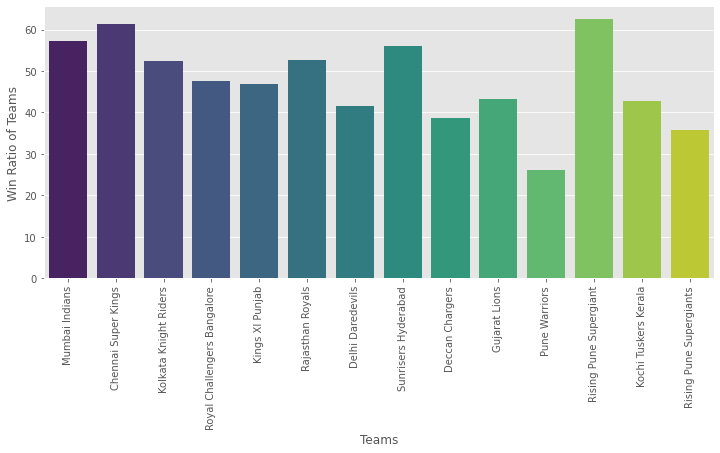

In [30]:
plt.figure(figsize=(12,5))
sns.barplot(x='Teams',y='Win Ratio of Teams',palette='viridis',data=teams_df)
plt.xticks(rotation='vertical')

In [31]:
teams_df.style.background_gradient(cmap='Reds')

,Teams,Winning Matches,Total Matches,Win Ratio of Teams
0,Mumbai Indians,98,171,57.309942
1,Chennai Super Kings,90,147,61.224490
2,Kolkata Knight Riders,86,164,52.439024
3,Royal Challengers Bangalore,79,166,47.590361
4,Kings XI Punjab,76,162,46.913580
5,Rajasthan Royals,70,133,52.631579
6,Delhi Daredevils,67,161,41.614907
7,Sunrisers Hyderabad,52,93,55.913978
8,Deccan Chargers,29,75,38.666667
9,Gujarat Lions,13,30,43.333333


In [32]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [33]:
city = matches['city'].nunique()
print(f'Total cities : {city}')

Total cities : 32


### Name of Cities 

In [34]:
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [35]:
location = matches['city']+', ' + matches['venue']


In [36]:
location = pd.DataFrame(data=location)
location.rename(columns={0:'Location'},inplace=True)

In [37]:
location.head()

,Location
0,"Hyderabad, Rajiv Gandhi International Stadium,..."
1,"Pune, Maharashtra Cricket Association Stadium"
2,"Rajkot, Saurashtra Cricket Association Stadium"
3,"Indore, Holkar Cricket Stadium"
4,"Bangalore, M Chinnaswamy Stadium"


## Umpire List

In [38]:
temp_df = pd.melt(matches, id_vars=['id'], value_vars=['umpire1', 'umpire2','umpire3'])
temp_df

,id,variable,value
0,1,umpire1,AY Dandekar
1,2,umpire1,A Nand Kishore
2,3,umpire1,Nitin Menon
3,4,umpire1,AK Chaudhary
4,5,umpire1,NaN
...,...,...,...
2083,7949,umpire3,Marais Erasmus
2084,7950,umpire3,S Ravi
2085,7951,umpire3,Kumar Dharmasena
2086,7952,umpire3,Anil Chaudhary


In [39]:
temp_df['value'].unique()

array(['AY Dandekar', 'A Nand Kishore', 'Nitin Menon', 'AK Chaudhary',
       nan, 'A Deshmukh', 'KN Ananthapadmanabhan', 'YC Barde', 'S Ravi',
       'CB Gaffaney', 'M Erasmus', 'NJ Llong', 'CK Nandan', 'Asad Rauf',
       'MR Benson', 'Aleem Dar', 'SJ Davis', 'BF Bowden', 'IL Howell',
       'DJ Harper', 'RE Koertzen', 'BR Doctrove', 'AV Jayaprakash',
       'BG Jerling', 'HDPK Dharmasena', 'S Asnani', 'GAV Baxter',
       'SS Hazare', 'K Hariharan', 'SL Shastri', 'SK Tarapore',
       'SJA Taufel', 'S Das', 'AM Saheba', 'PR Reiffel', 'JD Cloete',
       'VA Kulkarni', 'BNJ Oxenford', 'C Shamshuddin', 'RK Illingworth',
       'RM Deshpande', 'K Srinath', 'SD Fry', 'PG Pathak', 'K Bharatan',
       'Chris Gaffaney', 'Rod Tucker', 'Nigel Llong', 'Anil Chaudhary',
       'K Ananthapadmanabhan', 'O Nandan', 'A Nanda Kishore',
       'Vineet Kulkarni', 'Bruce Oxenford', 'Marais Erasmus',
       'Kumar Dharmasena', 'VK Sharma', 'GA Pratapkumar', 'RB Tiffin',
       'I Shivram', 'SD Ranade'

In [40]:
ump = temp_df['value'].nunique()
print(f'Total Umpires in IPL : {ump}')

Total Umpires in IPL : 69


In [41]:
up = temp_df['value'].value_counts().head(10)
up = up.to_frame()
up.reset_index(inplace=True)

In [42]:
type(up)
up.columns = ['Umpires','Match']
up
# S Ravi Umpired in 101 matches

,Umpires,Match
0,S Ravi,101
1,HDPK Dharmasena,87
2,C Shamshuddin,71
3,AK Chaudhary,58
4,SJA Taufel,55
5,M Erasmus,54
6,Asad Rauf,51
7,BR Doctrove,42
8,CK Nandan,41
9,RE Koertzen,41


## Top 10 Umpires

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

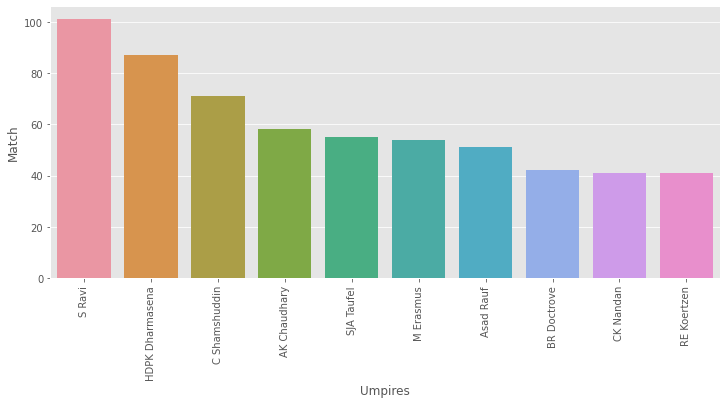

In [43]:
plt.figure(figsize=(12,5))
sns.barplot(x='Umpires',y='Match',data=up)
plt.xticks(rotation='vertical')

## Toss Decision

In [44]:
field = matches['toss_decision'].value_counts()['field']
bat = matches['toss_decision'].value_counts()['bat']

In [45]:
print(f'Decisions of fields by winning toss : {field}')
print(f'Decisions of bat by winning toss : {bat}')

Decisions of fields by winning toss : 413
Decisions of bat by winning toss : 283


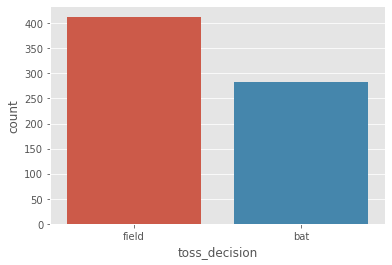

In [46]:
sns.countplot(x='toss_decision',data=matches)

Text(0.5, 1.0, 'Toss Decision Percentage')

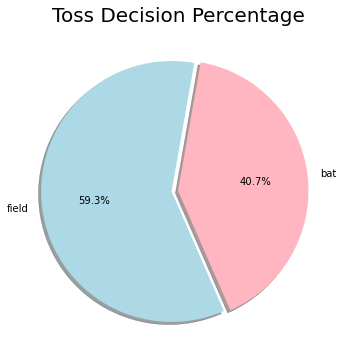

In [47]:
Pie_chart = matches['toss_decision'].value_counts().copy()
sizes = (np.array((Pie_chart/Pie_chart.sum())*100))
labels = np.array(Pie_chart.index)
color = ['lightblue','lightpink']
plt.figure(figsize=(12,6))
plt.pie(sizes,labels=labels,colors=color,startangle=80,autopct='%1.1f%%', shadow=True,explode=(0.05,0))
plt.title('Toss Decision Percentage',{'fontsize':20})

# Most teams prefer to select filed first

In [48]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


## Visulization - Player of Match

In [49]:
# top-10 player of match
mom = matches['player_of_match'].value_counts().head(10)
type(mom)

pandas.core.series.Series

In [50]:
mom.index

Index(['CH Gayle', 'AB de Villiers', 'YK Pathan', 'RG Sharma', 'DA Warner',
       'MS Dhoni', 'SK Raina', 'G Gambhir', 'SR Watson', 'AM Rahane'],
      dtype='object')

In [51]:
mom = mom.to_frame()

In [52]:
mom.reset_index(inplace=True)

In [53]:
mom = mom.rename(columns={'index':'Player'})
mom

,Player,player_of_match
0,CH Gayle,20
1,AB de Villiers,18
2,YK Pathan,16
3,RG Sharma,16
4,DA Warner,15
5,MS Dhoni,14
6,SK Raina,14
7,G Gambhir,13
8,SR Watson,13
9,AM Rahane,12


## Top-10 Players of the match

<img src="images/captain.jpg" width="650" height="400">

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

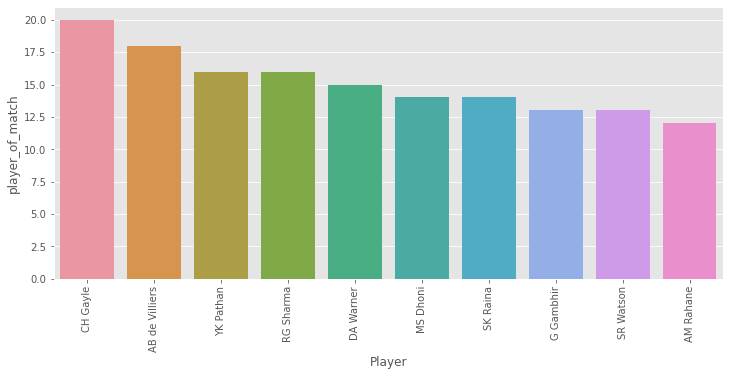

In [54]:
plt.figure(figsize=(12,5))
sns.barplot(x='Player',y='player_of_match',data=mom)
plt.xticks(rotation='vertical')

# CH Gayle won maximum MOM with 20 times

## DataFrame of all MOM

In [55]:
matches.groupby(by='player_of_match')[['winner','team1','team2','toss_winner','venue']].sum()   #This data shows MOM by teams and venue

,winner,team1,team2,toss_winner,venue
player_of_match,,,,,
A Chandila,Rajasthan Royals,Rajasthan Royals,Pune Warriors,Rajasthan Royals,Sawai Mansingh Stadium
A Kumble,Royal Challengers BangaloreDeccan ChargersRoya...,Royal Challengers BangaloreDeccan ChargersDecc...,Chennai Super KingsRoyal Challengers Bangalore...,Royal Challengers BangaloreRoyal Challengers B...,"MA Chidambaram Stadium, ChepaukNew Wanderers S..."
A Mishra,Delhi DaredevilsDelhi DaredevilsDeccan Charger...,Delhi DaredevilsKolkata Knight RidersDeccan Ch...,Deccan ChargersDelhi DaredevilsMumbai IndiansD...,Deccan ChargersDelhi DaredevilsDeccan Chargers...,Feroz Shah KotlaNew Wanderers StadiumWankhede ...
A Nehra,Mumbai IndiansDelhi DaredevilsChennai Super Ki...,Rajasthan RoyalsMumbai IndiansChennai Super Ki...,Mumbai IndiansDelhi DaredevilsDelhi Daredevils...,Mumbai IndiansMumbai IndiansDelhi DaredevilsMu...,Dr DY Patil Sports AcademyBuffalo ParkMA Chida...
A Singh,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,SuperSport Park
...,...,...,...,...,...
Washington Sundar,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,Wankhede Stadium
YK Pathan,Rajasthan RoyalsRajasthan RoyalsRajasthan Roya...,Deccan ChargersDeccan ChargersKolkata Knight R...,Rajasthan RoyalsRajasthan RoyalsRajasthan Roya...,Rajasthan RoyalsRajasthan RoyalsRajasthan Roya...,"Rajiv Gandhi International Stadium, UppalSawai..."
YS Chahal,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,Sharjah Cricket Stadium


## Result of matches

In [56]:
matches['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [57]:
matches['result'].value_counts()

normal       686
tie            7
no result      3
Name: result, dtype: int64

## Matches in which duck worth luis rule applied

*** 1 - Applied, 
   0 - Not Applied***

In [58]:
matches['dl_applied'].value_counts()

# There were 19 matches in which DL rule applied

0    677
1     19
Name: dl_applied, dtype: int64

In [59]:
winby_run = matches.loc[matches['win_by_runs']>0].count()['winner']


In [60]:
print(f'Total Matches win by runs : {winby_run}')

Total Matches win by runs : 315


In [61]:
winby_wkt = matches.loc[matches['win_by_wickets']>0].count()['winner']

In [62]:
print(f'Total Matches win by Wickets : {winby_wkt}')

Total Matches win by Wickets : 371


In [63]:
matches['win_by_runs'].max()  

146

In [64]:
matches.loc[matches['win_by_runs'] == 146] #matche won by maximum runs

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [65]:
matches.loc[matches['win_by_runs'] == 1]   #matches won by minimum runs

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
58,59,2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
105,106,2008,Mumbai,21-05-2008,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium,BF Bowden,GA Pratapkumar,NaN
163,164,2009,Johannesburg,17-05-2009,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,normal,0,Kings XI Punjab,1,0,Yuvraj Singh,New Wanderers Stadium,S Ravi,RB Tiffin,NaN
344,345,2012,Delhi,29-04-2012,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,1,0,V Sehwag,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
350,351,2012,Pune,03-05-2012,Mumbai Indians,Pune Warriors,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,SL Malinga,Subrata Roy Sahara Stadium,Asad Rauf,S Asnani,NaN
518,519,2015,Chennai,09-04-2015,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,1,0,A Nehra,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni,NaN
598,599,2016,Delhi,27-04-2016,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Gujarat Lions,1,0,CH Morris,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
614,615,2016,Chandigarh,09-05-2016,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,1,0,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,HDPK Dharmasena,NaN


In [66]:
matches['win_by_wickets'].max() 

10

In [67]:
matches.loc[matches['win_by_wickets']==10][['winner','city','team1','team2']]  #matches won by maximum Wickets

,winner,city,team1,team2
2,Kolkata Knight Riders,Rajkot,Gujarat Lions,Kolkata Knight Riders
34,Kings XI Punjab,Chandigarh,Delhi Daredevils,Kings XI Punjab
71,Deccan Chargers,Mumbai,Mumbai Indians,Deccan Chargers
119,Delhi Daredevils,Cape Town,Kings XI Punjab,Delhi Daredevils
183,Royal Challengers Bangalore,Bangalore,Rajasthan Royals,Royal Challengers Bangalore
298,Rajasthan Royals,Mumbai,Mumbai Indians,Rajasthan Royals
376,Mumbai Indians,Jaipur,Rajasthan Royals,Mumbai Indians
390,Chennai Super Kings,Chandigarh,Kings XI Punjab,Chennai Super Kings
542,Royal Challengers Bangalore,Delhi,Delhi Daredevils,Royal Challengers Bangalore
590,Sunrisers Hyderabad,Rajkot,Gujarat Lions,Sunrisers Hyderabad


In [68]:
matches.loc[matches['win_by_wickets']==1][['winner','city','team1','team2']]  #matches won by minimum Wickets

,winner,city,team1,team2
559,Kolkata Knight Riders,Kolkata,Kings XI Punjab,Kolkata Knight Riders
636,Chennai Super Kings,Mumbai,Mumbai Indians,Chennai Super Kings
642,Sunrisers Hyderabad,Hyderabad,Mumbai Indians,Sunrisers Hyderabad


## Toss Winners

In [69]:
toss_df = matches['toss_winner'].value_counts().to_frame()

In [70]:
toss_df

,toss_winner
Mumbai Indians,90
Kolkata Knight Riders,87
Delhi Daredevils,80
Chennai Super Kings,77
Royal Challengers Bangalore,77
Kings XI Punjab,75
Rajasthan Royals,69
Deccan Chargers,43
Sunrisers Hyderabad,42
Pune Warriors,20


In [71]:
toss_df.reset_index(inplace=True)

In [72]:
toss_df.rename(columns={'index':'Teams'},inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

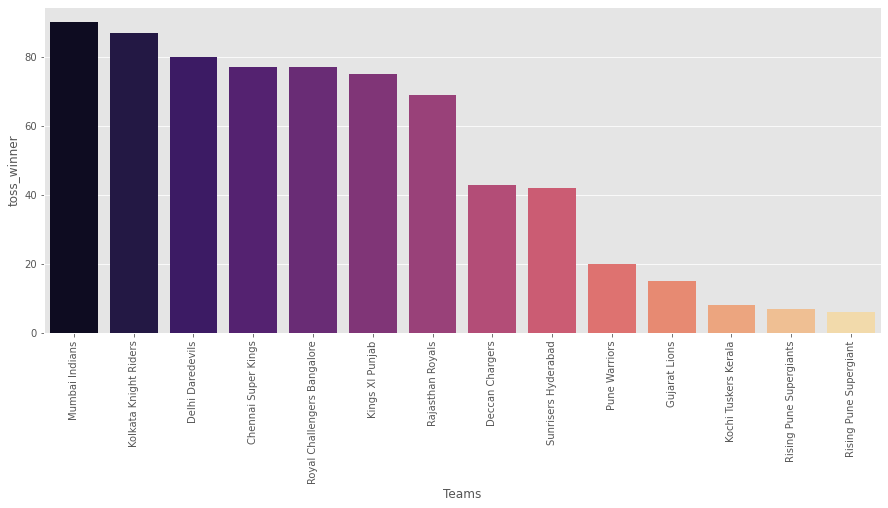

In [73]:
toss_df.iplot(kind='bar',x='Teams',y='toss_winner')


plt.figure(figsize=(15,6))
sns.barplot(x='Teams',y='toss_winner',data=toss_df,palette='magma')
plt.xticks(rotation='vertical')
# MI won highest number of tosses  with 90

In [74]:
MI_win_byBat = matches.loc[(matches['winner']=='Mumbai Indians') & (matches['win_by_runs']>0)].count()['win_by_runs']
print(f'Mumbai Indians win by Batting First : {MI_win_byBat}')

Mumbai Indians win by Batting First : 51


In [75]:
MI_win_byWkt = matches.loc[(matches['winner']=='Mumbai Indians') & (matches['win_by_wickets']>0)].count()['win_by_wickets']
print(f'Mumbai Indians win by Bowling First : {MI_win_byWkt}')

Mumbai Indians win by Bowling First : 46


In [76]:
CSK_win_byBat = matches.loc[(matches['winner']=='Chennai Super Kings') & (matches['win_by_runs']>0)].count()['win_by_runs']
print(f'Chennai Supar Kings win by Batting First : {CSK_win_byBat}')

Chennai Supar Kings win by Batting First : 49


In [77]:
CSK_win_byWkt = matches.loc[(matches['winner']=='Chennai Super Kings') 
                            & (matches['win_by_wickets']>0)].count()['win_by_wickets']
print(f'Chennai Supar kings win by Bowling First : {CSK_win_byWkt}')

Chennai Supar kings win by Bowling First : 41


In [78]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


## Matches - Result was tie or no conclusion

In [79]:
matches.loc[(matches['result']=='tie') | (matches['result']=='no result')][['season','team1','team2','result']]

,season,team1,team2,result
33,2017,Gujarat Lions,Mumbai Indians,tie
125,2009,Rajasthan Royals,Kolkata Knight Riders,tie
189,2010,Kings XI Punjab,Chennai Super Kings,tie
300,2011,Delhi Daredevils,Pune Warriors,no result
387,2013,Royal Challengers Bangalore,Sunrisers Hyderabad,tie
400,2013,Delhi Daredevils,Royal Challengers Bangalore,tie
475,2014,Rajasthan Royals,Kolkata Knight Riders,tie
535,2015,Rajasthan Royals,Kings XI Punjab,tie
545,2015,Royal Challengers Bangalore,Rajasthan Royals,no result
570,2015,Delhi Daredevils,Royal Challengers Bangalore,no result


In [80]:
print(f'Result of Matches : \n{matches["result"].value_counts()}')

Result of Matches : 
normal       686
tie            7
no result      3
Name: result, dtype: int64


## Does toss plays an important role in matches?

In [81]:
ss = matches['toss_winner'] == matches['winner']
ss.groupby(ss).size()

# Toss plays an important role in winning
# There are 357 matches in which teams won toss as well won match

False    339
True     357
dtype: int64

### List of teams where teams won  both match and toss

In [82]:
matches[(matches['toss_decision']=='bat') & (matches['toss_winner']==matches['winner'])][['toss_winner','winner']]
# This dataframe shows the matches where team won match as well as toss

,toss_winner,winner
4,Royal Challengers Bangalore,Royal Challengers Bangalore
14,Delhi Daredevils,Delhi Daredevils
20,Sunrisers Hyderabad,Sunrisers Hyderabad
50,Delhi Daredevils,Delhi Daredevils
54,Royal Challengers Bangalore,Royal Challengers Bangalore
...,...,...
651,Kings XI Punjab,Kings XI Punjab
663,Sunrisers Hyderabad,Sunrisers Hyderabad
675,Rajasthan Royals,Rajasthan Royals
688,Rajasthan Royals,Rajasthan Royals


## Matches won per seasons

In [83]:
match_win_season = matches.groupby(by='season')['winner'].value_counts()

In [84]:
type(match_win_season)
pd.set_option('display.max_rows', 10)

In [85]:
match_win_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2018    Rajasthan Royals                7
        Kings XI Punjab                 6
        Mumbai Indians                  6
        Royal Challengers Bangalore     6
        Delhi Daredevils                5
Name: winner, Length: 92, dtype: int64

## Highest played matches by team in each season

In [86]:
match_win_season.sort_values(ascending=False).head(10)

season  winner               
2008    Rajasthan Royals         13
2013    Mumbai Indians           13
2017    Mumbai Indians           12
2012    Kolkata Knight Riders    12
2013    Chennai Super Kings      12
2014    Kings XI Punjab          12
2010    Mumbai Indians           11
2011    Chennai Super Kings      11
2012    Delhi Daredevils         11
2014    Kolkata Knight Riders    11
Name: winner, dtype: int64

## IPL Trophy

In [87]:
# Here 'duplicates' is used to manage duplicate data in our dataset.....By doing this we can know the winner of each year's IPL finals..Because we "keep" Last data

In [88]:
Trophy = matches.drop_duplicates(subset=['season'],keep='last')[['season','winner','venue']].sort_values(by='season').reset_index(drop=True)

In [89]:
print('IPl Season Winner Each Year:')
Trophy['winner'].value_counts()  # MI And CSK are the way too ahead then many teams...most trophies are in their hand..Only 6/14 teams were able to win trophies till now...

IPl Season Winner Each Year:


Chennai Super Kings      3
Mumbai Indians           3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: winner, dtype: int64

## MI and CSK won 3 IPL thophy from 2008-2018

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

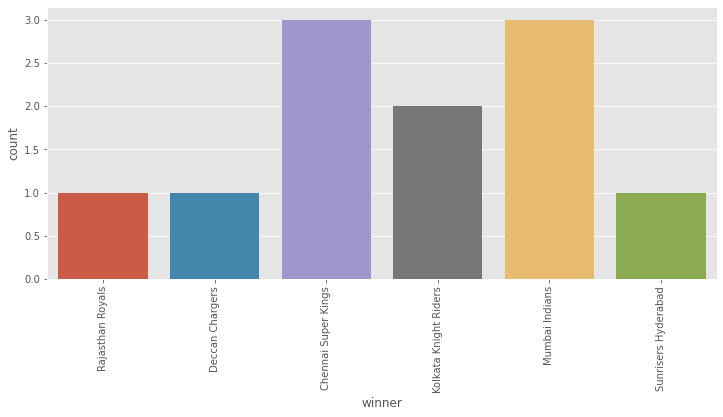

In [90]:
plt.figure(figsize=(12,5))
sns.countplot(x='winner',data=Trophy)
plt.xticks(rotation='vertical')